In [1]:
from legal_backend.r_to_py.r_to_py import init_R
from legal_backend.bartCause.bart_cause import BARTCause
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import permutation_test
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
init_R()

### Infer Law Effect

In [3]:
#load csv files and load possible laws
df = pd.read_csv('data/goodsam_clean.csv')

In [4]:
df.rename(columns={'death-rate-2013-2016':'delta_death_rate'}, inplace=True)

In [5]:
df['Urbanicity'] = df['Urbanicity'].map({'Urban':1, 'Rural':0})

In [6]:
df.columns

Index(['Percent-of-Population-Under-15-(2013-2017)',
       'Percent-of-Population-Aged-15-to-64-(2013-2017)',
       'Percent-of-Population-65+-(2013-2017)',
       'Percent-of-Population-White-(non-Hispanic)-(2013-2017)',
       'Percent-of-Populaiton-Black-(non-Hispanic)-(2013-2017)',
       'Percent-of-Population-Hispanic-or-Latino-(2013-2017)',
       'Percent-of-Population-Asian-(non-Hispanic)-(2013-2017)',
       'Percent-of-Population-Native-American/Alaska-Native-(non-Hispanic)-(2013-2017)',
       'Percent-of-Population-Native-Hawaiian/Pacific-Islander-(2013-2017)',
       'Percent-of-Population-Aged-25+-who-Have-at-Least-a-High-School-Diploma-(2013-2017)',
       'Percent-of-Population-Aged-25+-who-Have-a-Bachelor's-Degree-or-More-(2013-2017)',
       'Poverty-Rate-(2013-2017)', 'Median-Household-Income-(2013-2017)',
       'Unemployment-Rate-(2013-2017)',
       'Percent-of-Residents-with-a-Disability-(Aged-18-64)-(2013-2017)',
       'Percent-of-Popualtion-Employed-in-Mini

### Negative Patterns

In [132]:
# df_sub = df[df['Percent-of-Population-Under-15-(2013-2017)']>0.202].reset_index(drop=True)
# df_sub = df_sub[df_sub['Percent-of-Popualtion-Employed-in-Mining-and-Natural-Resources-(2013-2017)']>0.019].reset_index(drop=True)
# df_sub = df[df['Percent-of-Population-Under-15-(2013-2017)']>0.202].reset_index(drop=True)
# law = 'naloxone-thirdcare'

In [30]:
# df_sub = df[df['Percent-of-Residents-with-a-Disability-(Aged-18-64)-(2013-2017)']<0.116].reset_index(drop=True)
# df_sub = df[df['Percent-of-Population-Native-Hawaiian/Pacific-Islander-(2013-2017)']>0.001].reset_index(drop=True)
# df_sub = df[df['Percent-of-Population-Aged-25+-who-Have-a-Bachelor\'s-Degree-or-More-(2013-2017)']>0.221].reset_index(drop=True)
# df_sub = df_sub[df_sub['Economic-Risk-Score']==3].reset_index(drop=True)
# law = 'reportable-drugs_Federal Schedule I'

In [7]:
df_sub = df[df['Percent-of-Population-Native-Hawaiian/Pacific-Islander-(2013-2017)']>0.001].reset_index(drop=True)
df_sub = df_sub[df_sub['MDsPerCapita']<9.075].reset_index(drop=True)
law = 'goodsam-paraphernalia_Arrest'

In [ ]:
# df_sub = df[df['poverty_rate_(2013_2017)']<0.102].reset_index(drop=True)
# law = 'PDMP_any'

In [ ]:
# df_sub = df[df['median_household_income_(2013_2017)']<52314].reset_index(drop=True)
# df_sub = df_sub[df_sub['percent_of_population_hispanic_or_latino_(2013_2017)']>0.05].reset_index(drop=True)
# df_sub = df_sub[df_sub['percent_of_population_hispanic_or_latino_(2013_2017)']<0.139].reset_index(drop=True)

In [ ]:
# df_sub = df[df['percent_of_populaiton_black_(non_hispanic)_(2013_2017)']>0.03].reset_index(drop=True)
# df_sub = df_sub[df_sub['percent_of_population_hispanic_or_latino_(2013_2017)']>0.05].reset_index(drop=True)
# df_sub = df_sub[df_sub['percent_of_population_hispanic_or_latino_(2013_2017)']<0.139].reset_index(drop=True)
# law = 'PDMP_leowhenActive investigations'

In [8]:
print(law)
print(df_sub.shape[0])
df_sub.head()

goodsam-paraphernalia_Arrest
115


,Percent-of-Population-Under-15-(2013-2017),Percent-of-Population-Aged-15-to-64-(2013-2017),Percent-of-Population-65+-(2013-2017),Percent-of-Population-White-(non-Hispanic)-(2013-2017),Percent-of-Populaiton-Black-(non-Hispanic)-(2013-2017),Percent-of-Population-Hispanic-or-Latino-(2013-2017),Percent-of-Population-Asian-(non-Hispanic)-(2013-2017),Percent-of-Population-Native-American/Alaska-Native-(non-Hispanic)-(2013-2017),Percent-of-Population-Native-Hawaiian/Pacific-Islander-(2013-2017),Percent-of-Population-Aged-25+-who-Have-at-Least-a-High-School-Diploma-(2013-2017),...,goodsam-paroleyn,goodsam-parole_Protection from arrest,goodsam-parole_Protection from charge,goodsam-parole_Protection from prosecution,goodsam-parole_Protection from revocation of probation and/or parole,goodsam-parole_General protection from sanctions for violation of probation and/or parole,goodsam-mitigation,goodsam-mit-type_Controlled substances offenses,goodsam-mit-type_Alcohol-related offenses,goodsam-mit-type_Other offenses beyond controlled substances and alcohol-related violations
0,0.2120,0.6619,0.1260,0.4872,0.4202,0.0507,0.0068,0.0037,0.0022,0.8256,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2038,0.6140,0.1823,0.5789,0.0433,0.2919,0.0166,0.0461,0.0033,0.8492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2180,0.6081,0.1739,0.3275,0.0180,0.6197,0.0115,0.0088,0.0013,0.7172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2283,0.6439,0.1278,0.7474,0.0143,0.1607,0.0352,0.0130,0.0043,0.8723,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.2336,0.6441,0.1223,0.4365,0.5056,0.0232,0.0065,0.0017,0.0015,0.8177,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# construct train test data 
def prepare_train_data(df, law):
    train_idxs, test_idxs = train_test_split(list(df.index), test_size=0.2, random_state=1)

    X_df = df.iloc[:, :27].to_numpy()
    M = X_df.shape[1] 

    y = df[['delta_death_rate']].to_numpy()
    Z_law = df[[law]].to_numpy()
    # numerical columns
    num_cols = [c for c in range(M) if len(np.unique(X_df[:, c])) > 2] 


    X_train = X_df[train_idxs,:]
    X_test = X_df[test_idxs,:]

    y_train = y[train_idxs,:]
    y_test= y[test_idxs,:]

    Z_train = Z_law[train_idxs,:]
    Z_test= Z_law[test_idxs,:]

    # standardize data
    scaler_ = preprocessing.StandardScaler().fit(X_train[:,num_cols])
    X_train_scaled = np.copy(X_train)
    X_train_scaled[:,num_cols] = scaler_.transform(X_train[:,num_cols])

    X_test_scaled = np.copy(X_test)
    X_test_scaled[:,num_cols] = scaler_.transform(X_test[:,num_cols])
    return X_train_scaled, y_train, Z_train, X_test_scaled, y_test, Z_test


In [10]:
X_train_scaled, y_train, Z_train, X_test_scaled, y_test, Z_test = prepare_train_data(df_sub, law)

In [11]:
bart_eval = BARTCause()

In [12]:
bart_eval.fit(X_train_scaled, y_train, Z_train, n_samples=1000,  n_burn=200,  n_chains=10)

In [13]:
def rmse(y, y_pred):
    rmse = np.sqrt((np.sum((y - y_pred) ** 2) / y.shape[0]))
    return rmse

In [14]:
def nrmse(y, y_pred, norm_method):
    rmse = np.sqrt((np.sum((y - y_pred) ** 2) / y.shape[0]))
    if norm_method=='mean':
        nrmse = rmse / y.mean()
    elif norm_method=='range':
        nrmse = rmse / (y.max() - y.min())
    else:
        nrmse = rmse
    return nrmse

In [15]:
# evaluate BART fit on response surface
newData = np.concatenate((X_test_scaled, Z_test), axis=1)

y_test_predicted_ = bart_eval.predict(newData, infer_type="mu")
y_test_predicted = y_test_predicted_[:,np.newaxis]

In [16]:
print("BART RMS:", rmse(y_test,y_test_predicted),"\n", "Baseline RMS:", rmse(y_test,y_test.mean()))

BART RMS: 13.803622664100988 
 Baseline RMS: 15.062015062739574


In [17]:
def r_square(y, y_pred):
    # residual sum of squares
    ss_res = np.sum((y - y_pred) ** 2)

    # total sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [18]:
# evaluate BART fit on response surface
newData = np.concatenate((X_test_scaled, Z_test), axis=1)

y_test_predicted_ = bart_eval.predict(newData, infer_type="mu")
y_test_predicted = y_test_predicted_[:,np.newaxis]

r_square(y_test,y_test_predicted)

0.16011465645999967

#### K-fold Cross Validation

In [19]:
def kfold_indices(data, k):

    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

In [20]:
fold_indices = kfold_indices(df_sub, 5)

In [21]:
def cross_validation_test(df, law, fold_indices):
    bartCause = BARTCause()
    
    X_df = df.iloc[:, :27].to_numpy()
    M = X_df.shape[1] 

    y = df[['delta_death_rate']].to_numpy()
    Z_law = df[[law]].to_numpy()
    # numerical columns
    num_cols = [c for c in range(M) if len(np.unique(X_df[:, c])) > 2] 

    scores = []

    for fold, (train_indices, test_indices) in enumerate(fold_indices):
        print("fold:",fold)
        X_train, y_train, Z_train = X_df[train_indices,:], y[train_indices,:], Z_law[train_indices,:]
        X_test, y_test, Z_test = X_df[test_indices,:], y[test_indices,:], Z_law[test_indices,:]

        # standardize data
        scaler_ = preprocessing.StandardScaler().fit(X_train[:,num_cols])
        X_train_scaled = np.copy(X_train)
        X_train_scaled[:,num_cols] = scaler_.transform(X_train[:,num_cols])

        X_test_scaled = np.copy(X_test)
        X_test_scaled[:,num_cols] = scaler_.transform(X_test[:,num_cols])
        
        # Train the model on the training data
        bartCause.fit(X_train_scaled, y_train, Z_train, n_samples=1000,  n_burn=200,  n_chains=10)

        # Make predictions on the test data
        test_data = np.concatenate((X_test_scaled, Z_test), axis=1)
        y_test_pred_ = bartCause.predict(test_data, infer_type="mu")
        y_test_pred = y_test_pred_[:,np.newaxis]
        
        # Calculate the accuracy score for this fold
        fold_score = nrmse(y_test, y_test_pred, 'range')
        
        # Append the fold score to the list of scores
        scores.append(fold_score)

    # Calculate the mean accuracy across all folds
    mean_score = np.mean(scores)

    return scores, mean_score

In [22]:
scores, mean_score = cross_validation_test(df_sub, law, fold_indices)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Score:", mean_score)

fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
K-Fold Cross-Validation Scores: [0.34296096486971134, 0.4407772921288203, 0.1876490868141114, 0.24671734607737827, 0.2958474785551608]
Mean Score: 0.30279043368903646


#### Permutation Test

In [23]:
# construct train test data 
def prepare_permute_data(df, law):

    X_df = df.iloc[:, :27].to_numpy()
    M = X_df.shape[1] 

    y = df[['delta_death_rate']].to_numpy()
    Z_law = df[[law]].to_numpy()
    # numerical columns
    num_cols = [c for c in range(M) if len(np.unique(X_df[:, c])) > 2] 


    # standardize data
    scaler_ = preprocessing.StandardScaler().fit(X_df[:,num_cols])
    X_scaled = np.copy(X_df)
    X_scaled[:,num_cols] = scaler_.transform(X_df[:,num_cols])

    return X_scaled, y, Z_law


In [24]:
bartCause = BARTCause()
X_scaled, y, Z_law = prepare_permute_data(df_sub, law)

In [25]:
bartCause.fit(X_scaled, y, Z_law, n_samples=1000,  n_burn=200,  n_chains=10)

In [26]:
# evaluate BART fit on response surface
newData = np.concatenate((X_scaled, Z_law), axis=1)

predicted_Z1 = bartCause.predict(newData, infer_type="mu.1")
predicted_Z0 = bartCause.predict(newData, infer_type="mu.0")
# predicted_Z1 = predicted_Z1_[:,np.newaxis]
# predicted_Z0 = predicted_Z0_[:,np.newaxis]
mean_law0 = predicted_Z0.mean()
mean_law1 = predicted_Z1.mean()

In [27]:
# prepare for permutation test
def statistic(x, y):
    return np.mean(x) - np.mean(y)

#### Permutation test

In [30]:
res_permute = permutation_test((predicted_Z0, predicted_Z1), statistic, alternative='less')
res_permute

PermutationTestResult(statistic=-2.2029899004849582, pvalue=0.0713, null_distribution=array([-1.44639229,  1.85898482,  1.58817888, ..., -2.1311085 ,
       -1.21413939,  0.73343724]))

#### Paired Samples t-Test (Dependent Samples t-Test)

In [31]:
res_ttest = stats.ttest_rel(predicted_Z0, predicted_Z1, alternative='less')
res_ttest

TtestResult(statistic=-45.4404390822418, pvalue=3.5299964204844855e-75, df=114)

#### Mann-Whitney U Test / Wilcoxon Rank-Sum Test (No normal distribution assumption)

In [32]:
res_mannwhitneyu = stats.mannwhitneyu(predicted_Z0, predicted_Z1, alternative='less')
res_mannwhitneyu

MannwhitneyuResult(statistic=5752.0, pvalue=0.04414816644975827)

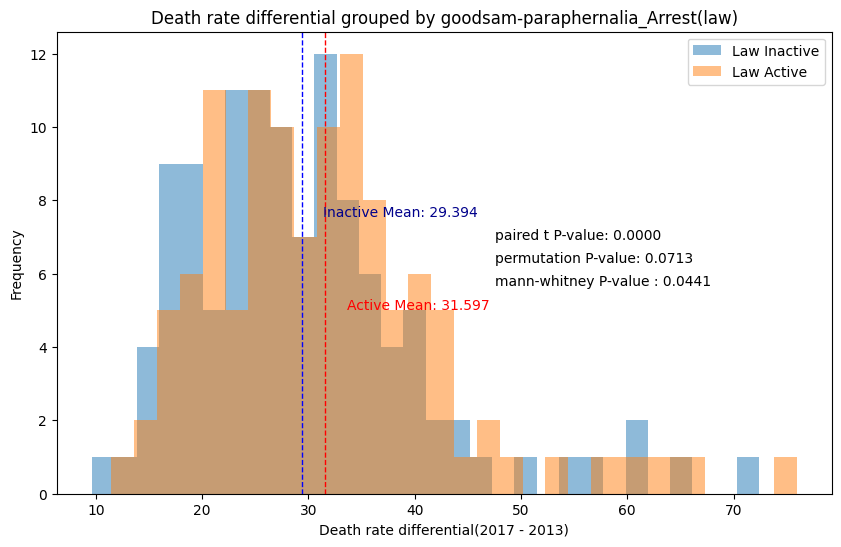

In [33]:

plt.figure(figsize=(10, 6))
plt.hist(predicted_Z0, bins=30, alpha=0.5, label='Law Inactive')
plt.hist(predicted_Z1, bins=30, alpha=0.5, label='Law Active')

plt.axvline(mean_law0, color='blue', linestyle='dashed', linewidth=1)
plt.text(mean_law0 + 2, plt.ylim()[1] * 0.6, f'Inactive Mean: {mean_law0:.3f}', color='darkblue')
plt.axvline(mean_law1, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_law1 + 2, plt.ylim()[1] * 0.4, f'Active Mean: {mean_law1:.3f}', color='red')

plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * 0.45, f'mann-whitney P-value : {res_mannwhitneyu.pvalue:.4f}', color='black')
plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * 0.5, f'permutation P-value: {res_permute.pvalue:.4f}', color='black')
plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * 0.55, f'paired t P-value: {res_ttest.pvalue:.4f}', color='black')


plt.xlabel('Death rate differential(2017 - 2013)')
plt.ylabel('Frequency')
plt.title('Death rate differential grouped by '+ law+'(law)')
plt.legend()
# plt.savefig("res/law_"+law+".png")
plt.show()